In [1]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import matplotlib.ticker as mticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

import scipy
from scipy.optimize import curve_fit
import sympy as sym


In [2]:
#fileLocation = 'C:\\Yuva\\ITU\\3rd Sem\\Research Topics\\Movies & Gender\\Data\\IMDb\\stage3FinalProcessedDF_Nov-17-2019.csv'
#fileLocation = 'C:\\Users\\VictorY\\Desktop\\TestData\\stage3FinalProcessedDF_Nov-24-2019.csv'
#fileLocation = 'C:\\Users\\VictorY\\Desktop\\TestData\\stage3FinalProcessedDF_Nov-17-2019.csv'
fileLocation = 'C:\\Users\\VictorY\\Desktop\\TestData\\stage3FinalProcessedDF_Dec-15-2019.csv'




In [3]:
df = pd.read_csv(fileLocation)

In [4]:
# Testing Draw Plot - Version 1

def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red',linestyle='solid')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    plt.savefig(title, format='jpeg', dpi=1200)



In [5]:
def howGoodIsMyLinearFit(x,y):
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    if(p_value<0.05):
        print("The p-value : ",str(p_value)," is a good fit (less than 0.05)\n")
    else:
        print("The p-value : ",str(p_value)," is a bad fit")
    print("The r^2 value is : ",str(r_value**2)," which represents that the model explains",str(round((r_value**2 * 100),2)),"% of the variability in the response data around its mean.")
    return

In [6]:
def howGoodIsMyExponentialFit():
    residuals = y- exponenial_func(x, *popt)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

# Number of movies produced over the years

In [7]:
# Dataframe without duplicate movies
withoutDuplicateMovieDF = df.drop_duplicates(subset=['movie_id'], keep=False)

# Year wise count of movies 
YearWiseCountOfMovies = withoutDuplicateMovieDF.movie_year.value_counts()

In [8]:
type(YearWiseCountOfMovies)

pandas.core.series.Series

In [31]:
# Testing Draw Plot - Version 1

def plot_MoviesReleasedOverTheYears(df, x, y, title="", xlabel='Movie released year', ylabel='Number of Movies', dpi=100):
    #plt.figure(figsize=(15,6))
    fig, ax = plt.subplots(figsize=(15,6))
    plt.xlabel('Movie released year')
    plt.ylabel('Number of Movies')
    #ax.plot(x, y, color='tab:red',linestyle='solid')
#     ax = plt.axes([0, 0, 3, 0.5])
    plt.autoscale(enable=True)
    ax.plot(x, y)
    ax.set_xlim(1880,2020)
    ax.set_ylim(-1000,25000)
    ax.xaxis.set_major_locator(MultipleLocator(20))
    ax.xaxis.set_minor_locator(MultipleLocator(4))
    ax.yaxis.set_major_locator(MultipleLocator(5000))
    ax.yaxis.set_minor_locator(MultipleLocator(1000))
#     ax.xaxis.set_minor_locator(AutoMinorLocator())
#     ax.tick_params(which='both', width=2)
#     ax.tick_params(which='major', length=5)
#     ax.tick_params(which='minor', length=5, color='r')
    ax.grid(which='major', color='#CCCCCC', linestyle='--')
    ax.grid(which='minor', color='#CCCCCC', linestyle=':')
    # Show ticks outwards
    ax.tick_params(which = 'both', direction = 'out', color ='r')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    h1, l1 = ax.get_legend_handles_labels()
    plt.grid(which = 'both', linestyle='--', linewidth=1)
    ax.legend(['Number of released movies'])
    
    SMALL_SIZE = 15
    MEDIUM_SIZE = 20
    BIGGER_SIZE = 25

    #plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
    #plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
   
    plt.savefig('Number_of_movies_produced_over_years.eps')
    plt.show()
    



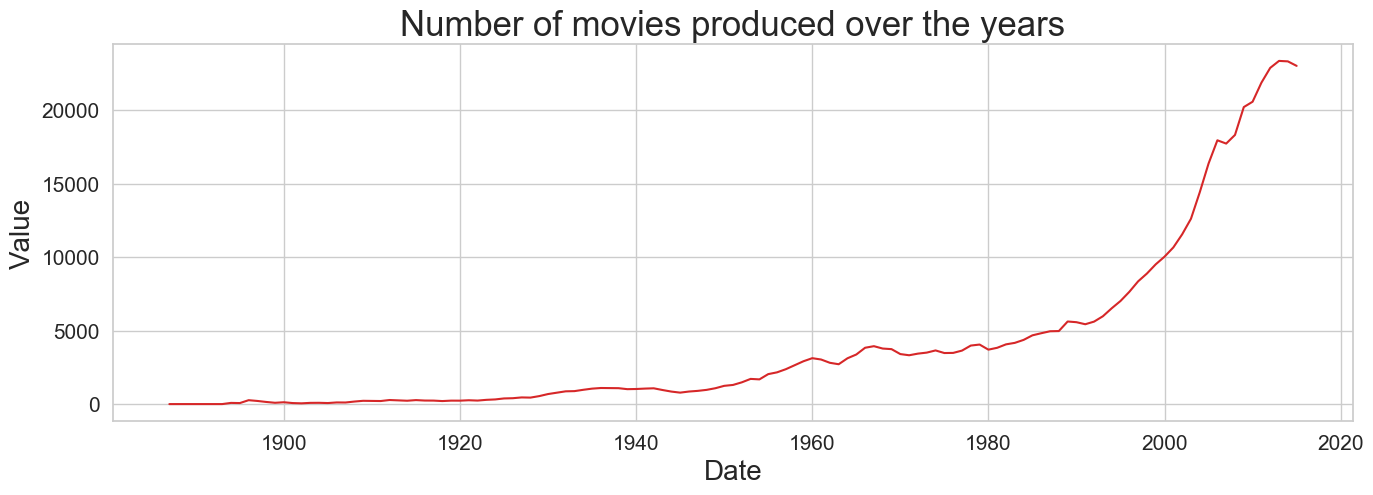

<Figure size 432x288 with 0 Axes>

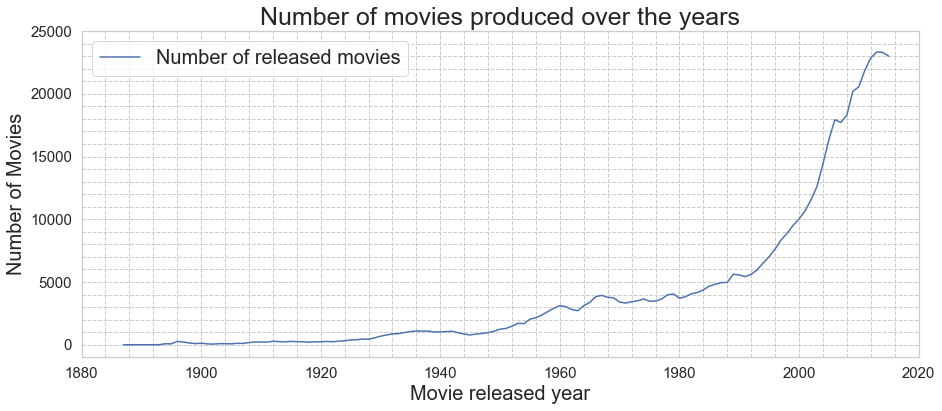

In [33]:
# Number of movies produced over the years by both the gender

yearDF = pd.DataFrame({'Year':YearWiseCountOfMovies.index,'Count':YearWiseCountOfMovies.values})
yearDF = yearDF.sort_values(by ='Year')
yearDF = yearDF.reset_index(drop=True)
yearDF = yearDF[yearDF.Year <= 2015]
plot_df(yearDF, x=yearDF.Year, y=yearDF.Count, title='Number of movies produced over the years')
plot_MoviesReleasedOverTheYears(yearDF, x=yearDF.Year, y=yearDF.Count, title='Number of movies produced over the years',xlabel= 'Movie released year', ylabel = 'Number of Movies',dpi=1000)

# Exponential Curve Fit

In [11]:
x = np.array(yearDF.Year)
y = np.array(yearDF.Count)

In [12]:
# Convert to float

x = np.array(x, dtype=float) #transform your data in a numpy array of floats 
y = np.array(y, dtype=float) #so the curve_fit can work

a = 0.04122068116140202 , b = -238.91186439996125, c = 461546.60202285834, d = -297198985.51061445


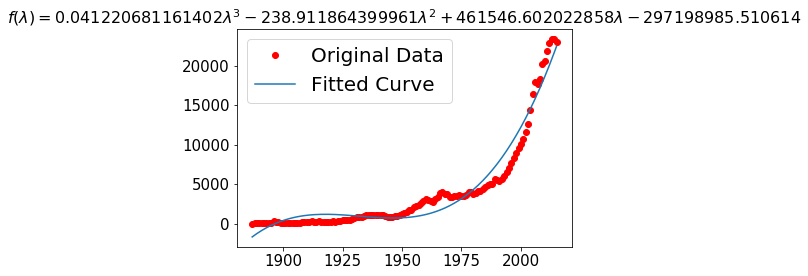

In [13]:
plt.plot(x, y, 'ro',label="Original Data")

def func(x, a, b, c, d):
    return a*x**3 + b*x**2 +c*x + d

# def func(x, a, b, c):
#     return a*np.exp(b*x)+c  

popt, pcov = curve_fit(func, x, y)

print("a = %s , b = %s, c = %s, d = %s" % (popt[0], popt[1], popt[2], popt[3]))

xs = sym.Symbol('\lambda')    
tex = sym.latex(func(xs,*popt)).replace('$', '')
plt.title(r'$f(\lambda)= %s$' %(tex),fontsize=16)

plt.plot(x, func(x, *popt), label="Fitted Curve") #same as line above \/
#plt.plot(x, popt[0]*x**3 + popt[1]*x**2 + popt[2]*x + popt[3], label="Fitted Curve") 

plt.legend(loc='upper left')
plt.show()

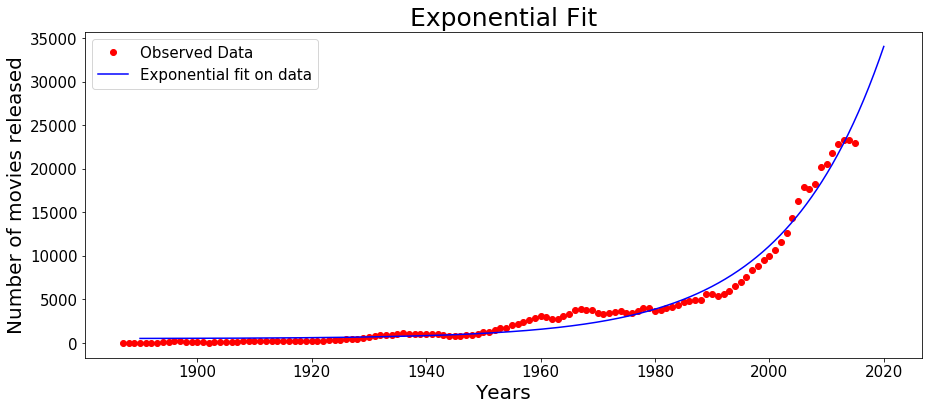

In [14]:
plt.figure(figsize=(15,6))
plt.plot(x,y,'ro',label="Observed Data")
# y = AeBx 
def exponenial_func(x, a, b, c):
    return a*np.exp(b*x)+c  

popt, pcov = curve_fit(exponenial_func, x, y, p0=(1, 1e-6, 1),maxfev=4000)

xx = np.linspace(1890, 2020, 1000)
yy = exponenial_func(xx, *popt)

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title







plt.plot(xx,yy,'b-',label="Exponential fit on data")
plt.title('Exponential Fit')
plt.xlabel(r'Years')
plt.ylabel(r'Number of movies released')
plt.legend(loc='upper left')




SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title



plt.savefig('Exponential_fit.eps', format='eps', dpi=1200)



In [15]:
# Fit for the exponentail curve

residuals = y- exponenial_func(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)

r_squared = 1 - (ss_res / ss_tot)



In [16]:
r_squared_value = howGoodIsMyExponentialFit()
print("The r^2 value is : ",str(r_squared_value),"which translates that the model explains",\
      str(round((r_squared_value**2 * 100),2)),"% of the variability in the response data around its mean.")

The r^2 value is :  0.9792315121289343 which translates that the model explains 95.89 % of the variability in the response data around its mean.


In [17]:
howGoodIsMyLinearFit(x,y)

The p-value :  2.8740559059889273e-28  is a good fit (less than 0.05)

The r^2 value is :  0.6173675208118745  which represents that the model explains 61.74 % of the variability in the response data around its mean.


# Number of movies produced by Female and Male directors

In [18]:
# Copy data frame for Plotting Male Female Year graph 

dfMaleFemaleYear= df.copy()

# Add a dummy column to act as count
dfMaleFemaleYear['dummy'] = 1

# Generate a pivot table for count of Female and male year wise
pivotMaleFemaleYear = pd.pivot_table(dfMaleFemaleYear, values='dummy', index=['Gender'],columns=['movie_year'], aggfunc=np.sum, fill_value=0)

In [19]:
pivotMaleFemaleYear = pivotMaleFemaleYear.sort_values(by='Gender',ascending=False)

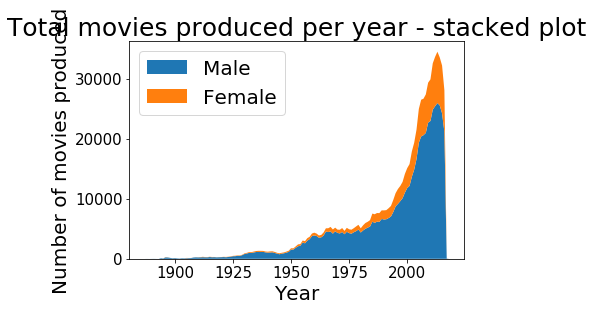

In [20]:
# Plot Number of movies by Female and Male directors

# https://matplotlib.org/gallery/lines_bars_and_markers/stackplot_demo.html#sphx-glr-gallery-lines-bars-and-markers-stackplot-demo-py

x = list(pivotMaleFemaleYear)
# y = np.vstack([y1, y2])
y = pivotMaleFemaleYear.to_numpy()
labelsGender = ["Male ", "Female"]

fig, ax = plt.subplots()
ax.stackplot(x, y, labels=labelsGender)
ax.legend(loc='upper left')
plt.title('Total movies produced per year - stacked plot')
plt.xlabel(r'Year')
plt.ylabel(r'Number of movies produced')
plt.show()

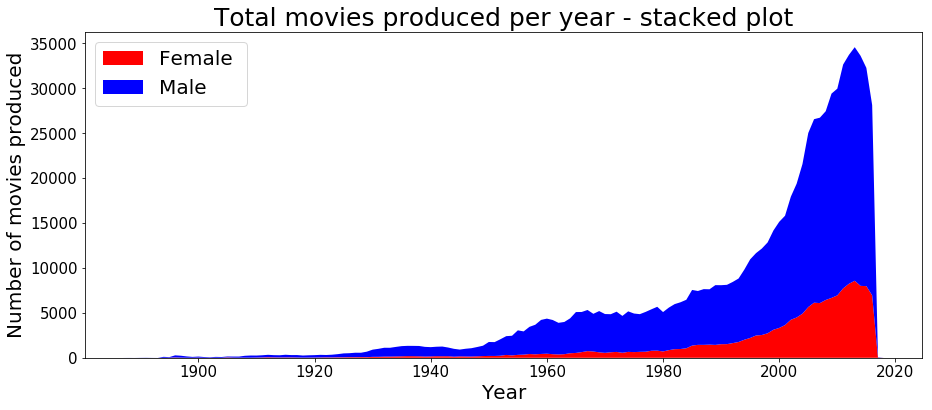

In [21]:
# Plot Number of movies by Female and Male directors

# https://matplotlib.org/gallery/lines_bars_and_markers/stackplot_demo.html#sphx-glr-gallery-lines-bars-and-markers-stackplot-demo-py

x = list(pivotMaleFemaleYear)
y1 = pivotMaleFemaleYear.to_numpy()
y[[0,1]] = y1[[1,0]]



labelsGender = ["Female ", "Male"]
fig, ax = plt.subplots(figsize=(15,6))
ax.stackplot(x, y, labels=labelsGender,colors=['red', 'blue'])
ax.legend(loc='upper left')

plt.title('Total movies produced per year - stacked plot')
plt.xlabel(r'Year')
plt.ylabel(r'Number of movies produced')


SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


plt.savefig('Total_movies_produced.eps', format='eps', dpi=1200)

plt.show()


In [22]:
x = list(pivotMaleFemaleYear)
# y = np.vstack([y1, y2])
y = pivotMaleFemaleYear.to_numpy()




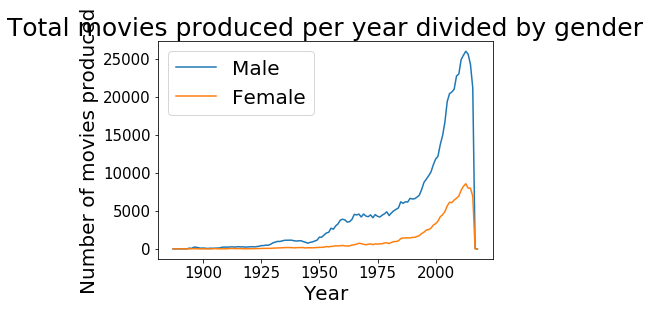

In [23]:
#plt.figure(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x,y[1])
plt.plot(x,y[0])
plt.legend(loc='upper left',labels = ['Male','Female'])
plt.title('Total movies produced per year divided by gender')
plt.xlabel(r'Year')
plt.ylabel(r'Number of movies produced')
plt.show()

In [24]:
# df

# Plot - Movies produced by Male and Female

In [25]:
df["Gender"].value_counts().index

Index(['Male', 'Female'], dtype='object')

In [26]:
def plot_male_female_movies_produced(dataFrame):
    # Total movies produced by Men VS Women 
    df = dataFrame
    sns.set(style="whitegrid")
    #sns.set(font_scale=5) 
    #ncount = len(df)
    #sns_plot = sns.countplot(x='Gender', hue="Gender" ,data = df)
    sns_plot = sns.countplot(x='Gender',data = df)
    #sns_plot.set_xlabel('Gender',fontsize=15)
    sns_plot.set_ylabel('Number of Movies',fontsize=15)
#     plt.setp(sns_plot.get_legend().get_texts(), fontsize='10') # for legend text
#     plt.setp(sns_plot.get_legend().get_title(), fontsize='15') # for legend title1
    ylabels = ['{:,.0f}'.format(x) + 'K' for x in sns_plot.get_yticks()/1000]
    sns_plot.set_yticklabels(ylabels)

    
#     for p in sns_plot.patches:
#         sns_plot.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1),ha='center',va='right')



    #fig = sns_plot.get_figure()
    plt.savefig('MALEvsFEMALE.eps', format='eps', dpi=1200)
    plt.show()

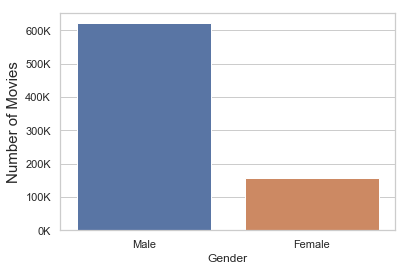

In [27]:
plot_male_female_movies_produced(df)

# Example plots

In [28]:
# # Import Data
# df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
# df.reset_index(inplace=True)

# # Prepare data
# df['year'] = [x.year for x in df.date]
# df['month'] = [x.strftime('%b') for x in df.date]
# years = df['year'].unique()

# # Prep Colors
# np.random.seed(100)
# mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# # Draw Plot
# plt.figure(figsize=(16,12), dpi= 80)
# for i, y in enumerate(years):
#     if i > 0:        
#         plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
#         plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# # Decoration
# plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
# plt.yticks(fontsize=12, alpha=.7)
# plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
# plt.show()

In [29]:
# # Prepare data
# newdf['year'] = [d.year for d in newdf.date_published]
# newdf['month'] = [d.strftime('%b') for d in newdf.date_published]
# years = newdf['year'].unique()

In [30]:
# # Prep Colors
# np.random.seed(100)
# mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# # Draw Plot
# plt.figure(figsize=(16,12), dpi= 80)
# for i, y in enumerate(years):
#     if i > 0:        
#         plt.plot('month', 'value', data=newdf.loc[df.year==y, :], color=mycolors[i], label=y)
#         plt.text(df.loc[newdf.year==y, :].shape[0]-.9, newdf.loc[newdf.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# # Decoration
# plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Unsure$', xlabel='$Month$')
# plt.yticks(fontsize=12, alpha=.7)
# plt.title("Seasonal Plot", fontsize=20)
# plt.show()